In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import imageio
import os
from skimage import color, io
import skimage
from importlib import reload
from matplotlib import rc
import cv2
rc('image', origin='lower')

In [2]:
photo_dir = "/Users/jesse/Data/SOC/2018-02-16 Tomografie/gesorteerd"

In [3]:
fn_format = os.path.join(photo_dir, "plak_%03d_%s%d.JPG")

In [4]:
pid = (2, 'v', 1)

In [5]:
fn_format % pid

'/Users/jesse/Data/SOC/2018-02-16 Tomografie/gesorteerd/plak_002_v1.JPG'

In [6]:
orig_img = io.imread(fn_format % pid)[::-1,:,:]

gscale_img = color.rgb2gray(orig_img)
red_img = orig_img[:,:,0]
grn_img = orig_img[:,:,1]
blu_img = orig_img[:,:,2]

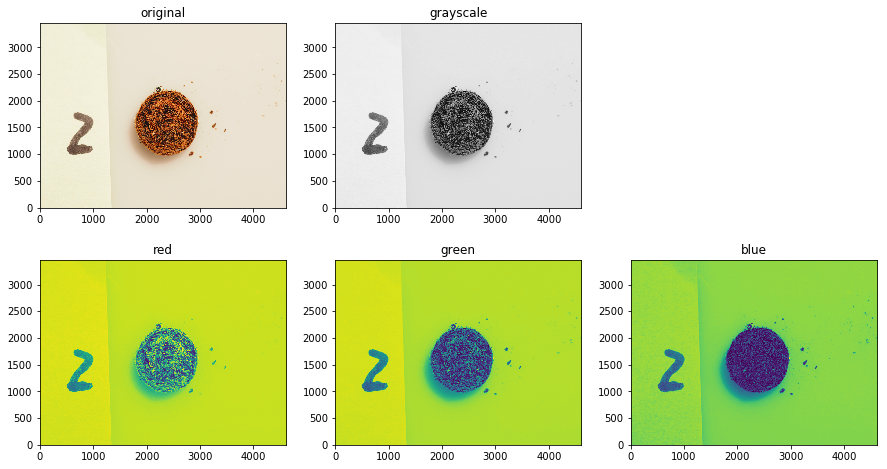

In [7]:
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.imshow(orig_img)
plt.title("original")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.subplot(232)
plt.imshow(gscale_img, cmap='gray')
plt.title("grayscale")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)


plt.subplot(234)
plt.imshow(red_img)
plt.title("red")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.subplot(235)
plt.imshow(grn_img)
plt.title("green")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.subplot(236)
plt.imshow(blu_img)
plt.title("blue")
# plt.xlim(1500,3000)
# plt.ylim(900,2300)

plt.show()

/Users/jesse/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


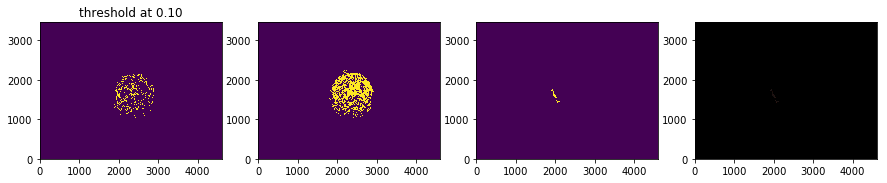

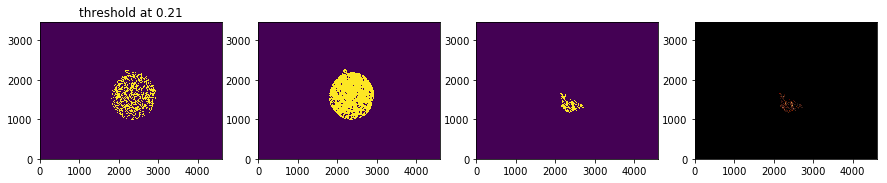

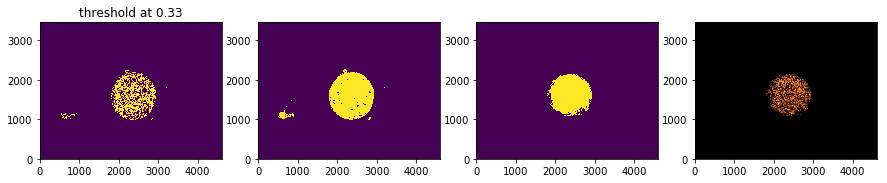

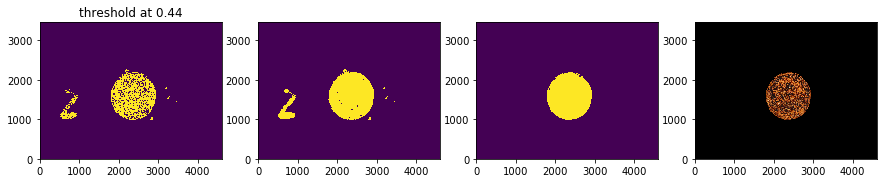

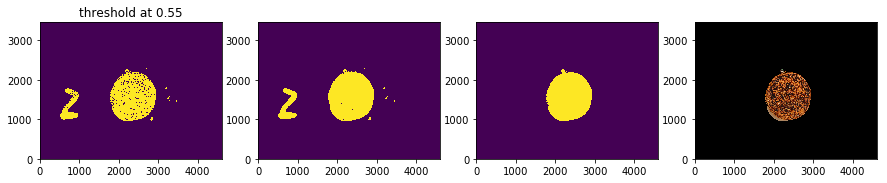

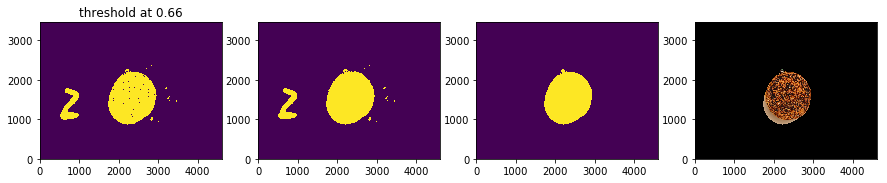

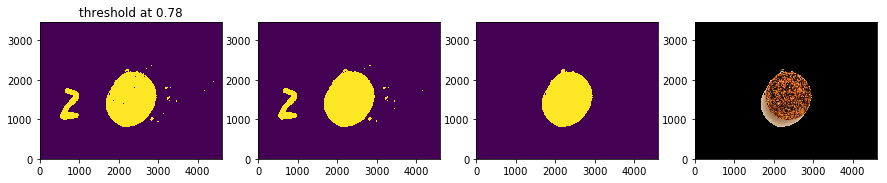

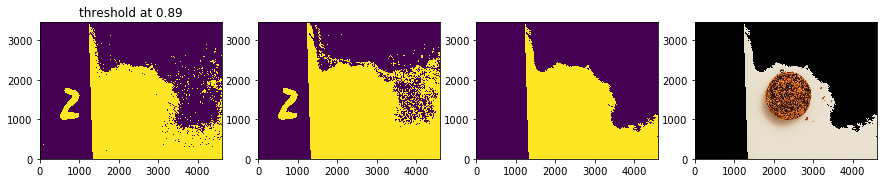

In [12]:
ths = np.linspace(0.1,1.0,8, endpoint=False)

closing_size = 20
# closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))

xs, ys = np.meshgrid(np.arange(closing_size), np.arange(closing_size))
xs = xs - ((closing_size - 1) // 2)
ys = ys - ((closing_size - 1) // 2)
rs = xs**2 + ys**2

closing_kernel = np.array((rs <= ((closing_size - 1)/ 2)**2) * 1, dtype=np.uint8)

for th in ths:
    plt.figure(figsize=(15,8))
    plt.subplot(141)
    plt.title("threshold at %.2f" % th)
    ret, bin_img = cv2.threshold(skimage.img_as_ubyte(gscale_img), int(th * 255), 255, cv2.THRESH_BINARY_INV)
    plt.imshow(bin_img)
    
    closed_bimg = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, closing_kernel)
    
    plt.subplot(142)
    plt.imshow(closed_bimg)
    
    # Find the largest contour and extract it
    im, contours, hierarchy = cv2.findContours(bin_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )

    maxContour = 0
    for contour in contours:
        contourSize = cv2.contourArea(contour)
        if contourSize > maxContour:
            maxContour = contourSize
            maxContourData = contour

    # Create a mask from the largest contour
    mask = np.zeros_like(bin_img)
    cv2.fillPoly(mask,[maxContourData],1)
    plt.subplot(143)
    plt.imshow(mask)
    
    # Use mask to crop data from original image
    finalImage = np.zeros_like(orig_img)
    finalImage = orig_img * mask[:,:,np.newaxis]
    plt.subplot(144)
    plt.imshow(finalImage)
    plt.show()